Utilizaremos dados do seaborn para esse exercício

In [355]:
import seaborn as sns

random_state = 90

In [356]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [357]:
healthexp = sns.load_dataset("healthexp")
healthexp.tail(20)

,Year,Country,Spending_USD,Life_Expectancy
254,2017,Japan,4412.852,84.2
255,2017,USA,10046.472,78.6
256,2018,Canada,5308.356,82.0
257,2018,Germany,6281.840,81.0
258,2018,France,5099.306,82.8
259,2018,Great Britain,4189.708,81.3
260,2018,Japan,4554.276,84.3
261,2018,USA,10451.386,78.7
262,2019,Canada,5189.721,82.2
263,2019,Germany,6407.928,81.3


Faremos agora, uma coluna com a média da expectativa de vida por ano para todos os países

In [358]:
healthexp['Life_Expectancy_Mean'] = healthexp.groupby('Year')['Life_Expectancy'].transform('mean')
healthexp.head()

,Year,Country,Spending_USD,Life_Expectancy,Life_Expectancy_Mean
0,1970,Germany,252.311,70.6,71.52
1,1970,France,192.143,72.2,71.52
2,1970,Great Britain,123.993,71.9,71.52
3,1970,Japan,150.437,72.0,71.52
4,1970,USA,326.961,70.9,71.52


In [359]:
healthexp_yearly = healthexp.drop(columns=['Country', 'Spending_USD', 'Life_Expectancy']).drop_duplicates(subset=['Year'])
healthexp_yearly.reset_index(drop=True, inplace=True)
healthexp_yearly

,Year,Life_Expectancy_Mean
0,1970,71.520000
1,1971,71.920000
2,1972,71.800000
3,1973,72.033333
4,1974,72.400000
5,1975,72.850000
6,1976,73.325000
7,1977,73.700000
8,1978,73.866667
9,1979,74.500000


<Axes: title={'center': 'Average Life Expectancy by Year'}, xlabel='Year'>

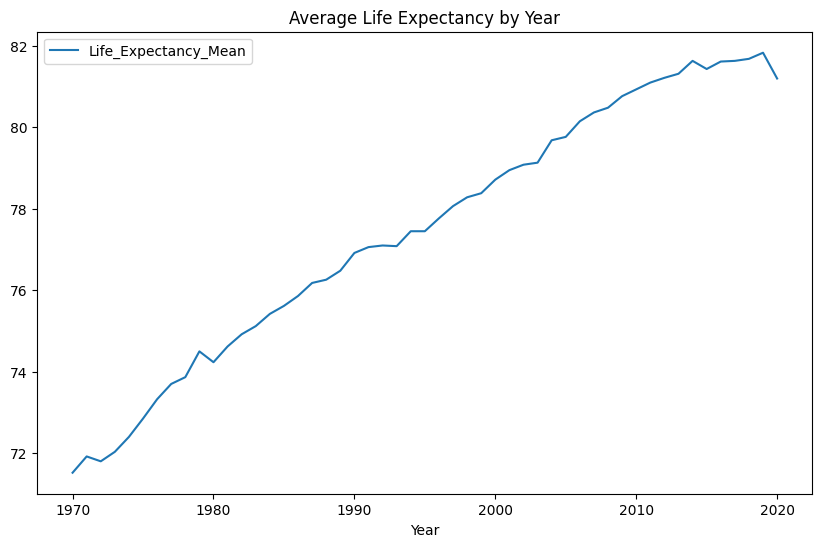

In [360]:
healthexp_yearly.plot(x='Year', y='Life_Expectancy_Mean', figsize=(10, 6), title='Average Life Expectancy by Year')

A queda no ano de 2020 pode prejudicar nossa análise, por isso escolhemos remover esse ano do nosso dataset.

In [361]:
healthexp_yearly = healthexp_yearly[healthexp_yearly['Year'] != 2020].reset_index(drop=True)
healthexp_yearly.tail()

,Year,Life_Expectancy_Mean
45,2015,81.433333
46,2016,81.616667
47,2017,81.633333
48,2018,81.683333
49,2019,81.833333


Dividiremos o dataset entre:
  - Características: elementos que serão usados pelo modelo para previsão
  - Alvo: os valores que queremos prever

In [362]:
X = healthexp_yearly[['Year']]
y = healthexp_yearly['Life_Expectancy_Mean']

X.head(), y.head()

(   Year
 0  1970
 1  1971
 2  1972
 3  1973
 4  1974,
 0    71.520000
 1    71.920000
 2    71.800000
 3    72.033333
 4    72.400000
 Name: Life_Expectancy_Mean, dtype: float64)

Vamos dividir entre treino e teste utilizando o método da própria scikit-learn

In [363]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
X_train.head(10)

,Year
21,1991
47,2017
7,1977
36,2006
45,2015
25,1995
17,1987
2,1972
14,1984
1,1971


Observe que, ao utilizarmos esse método de separação, estamos separando os datasets de forma aleatória

# Prevemos

Criando o modelo

In [364]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=random_state)

In [365]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=90)

Fazendo a previsão

In [366]:
y_pred = rf.predict(X_test)

y_pred

array([77.34013333, 77.63133333, 81.6365    , 81.4895    , 72.70166667,
       76.83266667, 76.32116667, 79.7705    , 77.1081    , 80.81266667])

O que isso significa? Vamos plotar pra visualizarmos de forma mais clara

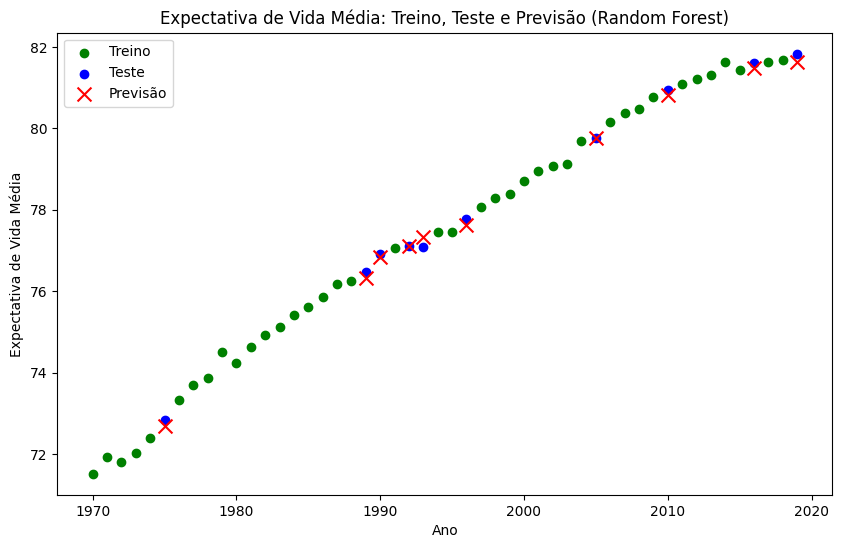

In [367]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Dados de treino
plt.scatter(X_train['Year'], y_train, color='green', label='Treino')

# Dados de teste
plt.scatter(X_test['Year'], y_test, color='blue', label='Teste')

# Previsão para os dados de teste
plt.scatter(X_test['Year'], y_pred, color='red', marker='x', s=100, label='Previsão')

plt.xlabel('Ano')
plt.ylabel('Expectativa de Vida Média')
plt.title('Expectativa de Vida Média: Treino, Teste e Previsão (Random Forest)')
plt.legend()
plt.show()

Podemos observar a comparação entre os valores reais e o que foi previsto de forma mais clara utilizando outro gráfico

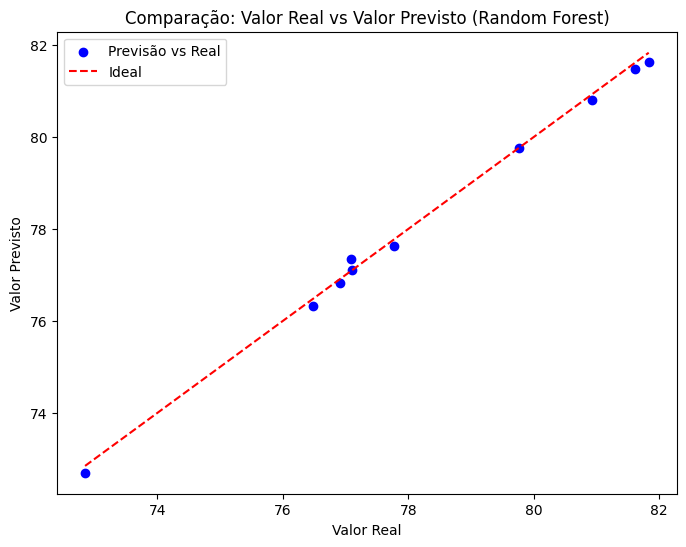

In [368]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Previsão vs Real')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.xlabel('Valor Real')
plt.ylabel('Valor Previsto')
plt.title('Comparação: Valor Real vs Valor Previsto (Random Forest)')
plt.legend()
plt.show()

Podemos, agora, calcular os erros da nossa previsão

In [369]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")

MAE: 0.1240
MSE: 0.0208
R²: 0.9971


Agora, podemos repetir o mesmo processo utilizando mais características para, quem sabe, melhorar o resultado

In [370]:
healthexp = sns.load_dataset("healthexp")
healthexp.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


In [371]:
healthexp['Spending_USD_Mean'] = healthexp.groupby('Year')['Spending_USD'].transform('mean')
healthexp['Life_Expectancy_Mean'] = healthexp.groupby('Year')['Life_Expectancy'].transform('mean')

healthexp_yarly_rich = healthexp.drop(columns=['Country', 'Spending_USD', 'Life_Expectancy']).drop_duplicates(subset=['Year'])
healthexp_yarly_rich.reset_index(drop=True, inplace=True)
healthexp_yarly_rich = healthexp_yarly_rich[healthexp_yarly_rich['Year'] != 2020].reset_index(drop=True)
healthexp_yarly_rich.tail(15)

,Year,Spending_USD_Mean,Life_Expectancy_Mean
35,2005,3603.304833,79.766667
36,2006,3803.356500,80.150000
37,2007,3987.788167,80.366667
38,2008,4154.351667,80.483333
39,2009,4322.644333,80.766667
40,2010,4518.969500,80.933333
41,2011,4712.202167,81.100000
42,2012,4885.364833,81.216667
43,2013,5070.150333,81.316667
44,2014,5221.396000,81.633333


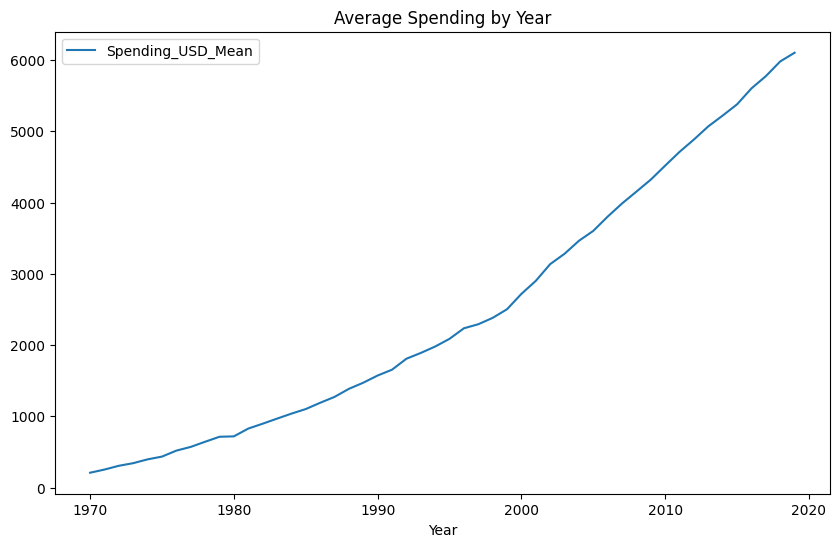

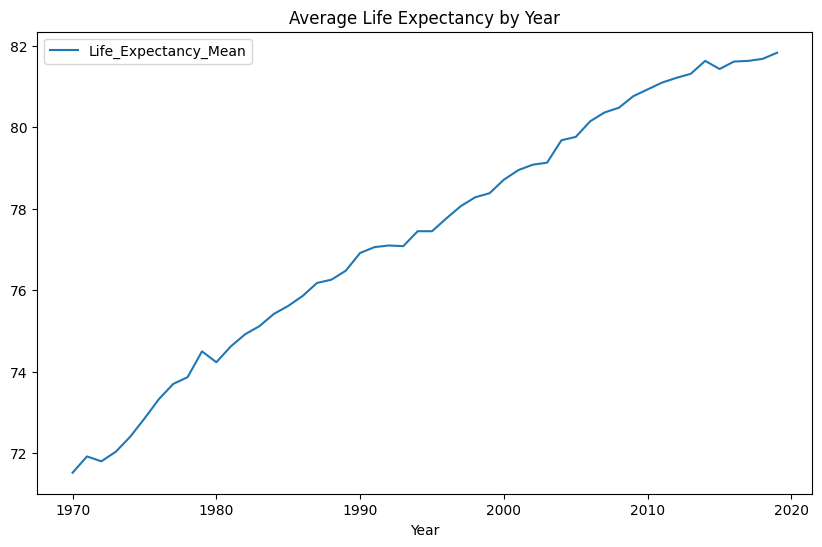

In [372]:
healthexp_yarly_rich.plot(x='Year', y='Spending_USD_Mean', figsize=(10, 6), title='Average Spending by Year');
healthexp_yarly_rich.plot(x='Year', y='Life_Expectancy_Mean', figsize=(10, 6), title='Average Life Expectancy by Year');

In [373]:
X = healthexp_yarly_rich[['Year', 'Spending_USD_Mean']]
y = healthexp_yarly_rich['Life_Expectancy_Mean']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

rf_rich = RandomForestRegressor(n_estimators=100, random_state=random_state)
rf_rich.fit(X_train, y_train)
y_pred_rich = rf_rich.predict(X_test)

mae_rich = mean_absolute_error(y_test, y_pred_rich)
mse_rich = mean_squared_error(y_test, y_pred_rich)
r2_rich = r2_score(y_test, y_pred_rich)

print(f"MAE (Modelo Simples): {mae:.4f}")
print(f"MSE (Modelo Simples): {mse:.4f}")
print(f"R² (Modelo Simples): {r2:.4f}\n")

print(f"MAE (Modelo com Spending): {mae_rich:.4f}")
print(f"MSE (Modelo com Spending): {mse_rich:.4f}")
print(f"R² (Modelo com Spending): {r2_rich:.4f}")

MAE (Modelo Simples): 0.1240
MSE (Modelo Simples): 0.0208
R² (Modelo Simples): 0.9971

MAE (Modelo com Spending): 0.1045
MSE (Modelo com Spending): 0.0185
R² (Modelo com Spending): 0.9974


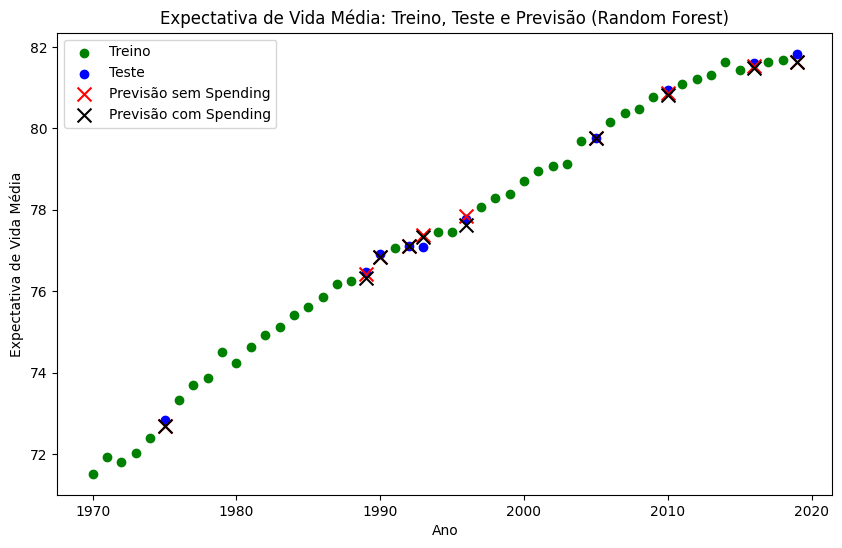

In [374]:
plt.figure(figsize=(10, 6))

# Dados de treino
plt.scatter(X_train['Year'], y_train, color='green', label='Treino')

# Dados de teste
plt.scatter(X_test['Year'], y_test, color='blue', label='Teste')

# Previsão para os dados de teste
plt.scatter(X_test['Year'], y_pred_rich, color='red', marker='x', s=100, label='Previsão sem Spending')
plt.scatter(X_test['Year'], y_pred, color='black', marker='x', s=100, label='Previsão com Spending')

plt.xlabel('Ano')
plt.ylabel('Expectativa de Vida Média')
plt.title('Expectativa de Vida Média: Treino, Teste e Previsão (Random Forest)')
plt.legend()
plt.show()

Vamos fazer um `param_grid` para brincar um pouco com os parametros do nosso modelo e buscar resultados melhores

In [375]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)

best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print()
print(f"MAE (Modelo sem Spending + GridSearch): {mae_best:.4f}")
print(f"MSE (Modelo sem Spending + GridSearch): {mse_best:.4f}")
print(f"R² (Modelo sem Spending + GridSearch): {r2_best:.4f}")


Melhores parâmetros encontrados:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

MAE (Modelo sem Spending + GridSearch): 0.1118
MSE (Modelo sem Spending + GridSearch): 0.0203
R² (Modelo sem Spending + GridSearch): 0.9971
